# Explore F40168_SI

The exonic region F40168_SI showed AI in the majority of mated and virgin genotypes. In Mated, 31 genotypes showed AI towards the line, while 7 showed AI towards the tester. In Virgin, 29 genotypes showed AI towards line and 9 genotypes towards tester.

I want to see if I can group genotypes based on cis-effects from the maren equations and then identify variants based on these similarities. The may not work and may be a stupid idea, but if it does work it would be cool.

In [1]:
%run '../ipython_startup.py'

Importing commonly used libraries: os, sys, numpy as np, scipy as sp, pandas as pd, matplotlib as mp, matplotlib.pyplot as plt, datetime as dt, mclib_Python/flagging as fg
Creating project level variables: MCLAB = /home/jfear/mclab, PROJ = /home/jfear/mclab/cegs_ase_paper, TODAY = 20150904
Adding ['scripts/mclib_Python', 'scripts/ase_Python'] to PYTHONPATH


In [137]:
# Additional libraries
from sas7bdat import SAS7BDAT as SAS
from clustering import cluster

In [123]:
# Import AI calls and determine which genotypes group
with SAS(os.path.join(PROJ, 'sas_data/clean_ase_sbs.sas7bdat')) as FH:
    ai = FH.to_data_frame()

# mated indicator showing direction
ai['mated_ind'] = 'No AI'
ai.loc[(ai['flag_AI_combined_m'] == 1) & (ai['q5_mean_theta_m'] > 0.5), 'mated_ind'] = 'Tester'
ai.loc[(ai['flag_AI_combined_m'] == 1) & (ai['q5_mean_theta_m'] < 0.5), 'mated_ind'] = 'Line'

# virgin indicator showing direction
ai['virgin_ind'] = 'No AI'
ai.loc[(ai['flag_AI_combined_v'] == 1) & (ai['q5_mean_theta_v'] > 0.5), 'virgin_ind'] = 'Tester'
ai.loc[(ai['flag_AI_combined_v'] == 1) & (ai['q5_mean_theta_v'] < 0.5), 'virgin_ind'] = 'Line'

# Combine indicators and come up with groups
ai['group'] = ai.apply(lambda x: x['mated_ind'] if x['mated_ind'] == x['virgin_ind'] else 'ambig', axis=1)

[clean_ase_sbs.sas7bdat] header length 65536 != 8192
[clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] header length 65536 != 8192
[clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] header length 65536 != 8192
[clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] header length 65536 != 8192
[clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] [clean_ase_sbs.sas7bdat] header length 65536 != 8192


In [160]:
ai['group'].value_counts()

Line      29
ambig     11
Tester     7
No AI      2
dtype: int64

In [139]:
# Import cis-effects from maren eq
maren = pd.read_csv(os.path.join(PROJ, 'pipeline_output/cis_effects/cis_line_effects.csv')) 

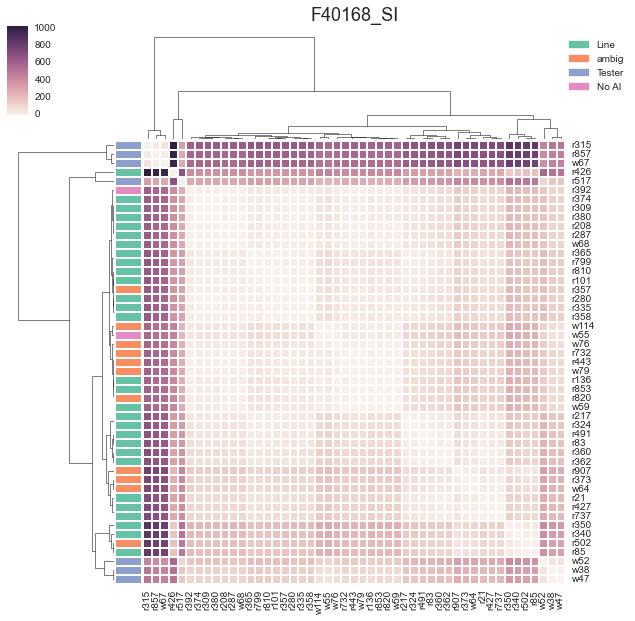

In [159]:
fig = cluster(ai, maren, 'F40168_SI')
fig.savefig('../../pipeline_output/similarity/clustermap_f40168_si.png')